In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("SDOH_Filtered_Data.csv")
df_counties = {}
for county in df["COUNTY"].unique():
    df_counties[county] = df[df["COUNTY"] == county]
for county in df_counties:
    df_counties[county] = df_counties[county].set_index("YEAR")
    df_counties[county] = df_counties[county].drop("STATE", axis = 1)
    df_counties[county] = df_counties[county].drop("COUNTY", axis = 1)
    df_counties[county] = df_counties[county].drop("COUNTYFIPS", axis = 1)
    df_counties[county] = df_counties[county].drop("STATEFIPS", axis = 1)


In [4]:
df = df_counties["Santa Clara County"]
df.shape

(10, 16)

In [5]:
df.head(10)

,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_LT_HS,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_NH_BED_STNGH,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS
YEAR,,,,,,,,,,,,,,,,
2009,343.9,85569.0,7.00,41.13,3.63,14.17,18.69,17.13,68.70,11.0,0.0,139100.0,160178.0,3655.0,1.0,12902.0
2010,333.3,86850.0,7.81,41.13,4.21,13.68,19.59,16.47,69.85,11.0,0.0,140143.0,152783.0,3678.0,1.0,13209.0
2011,318.7,89064.0,8.63,40.12,4.72,13.52,19.94,16.24,70.25,11.0,0.0,143179.0,144659.0,2829.0,1.0,19301.0
2012,311.5,90747.0,9.30,38.48,5.33,13.50,20.23,15.71,70.79,11.0,0.0,153815.0,144618.0,3453.0,1.0,12681.0
2013,303.1,91702.0,9.69,36.30,5.90,13.48,20.72,15.53,70.99,11.0,0.0,297430.0,155652.0,3443.0,1.0,12866.0
2014,300.4,93854.0,8.82,34.15,6.20,13.20,21.26,15.45,71.35,11.0,0.0,202523.0,150172.0,3415.0,1.0,13028.0
2015,299.8,96310.0,7.68,32.18,6.19,13.02,21.86,15.17,71.81,11.0,0.0,235637.0,154827.0,3640.0,1.0,13644.0
2016,300.7,101173.0,6.57,30.59,6.09,12.93,22.43,14.77,72.30,12.0,0.0,123416.0,158215.0,3640.0,2.0,13763.0
2017,303.7,106761.0,5.68,29.66,5.89,12.45,23.18,14.78,72.77,12.0,0.0,93685.0,162928.0,3641.0,2.0,14641.0


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
sc = StandardScaler()
df = df.drop ("COUNTYFIPS", axis = 1)
df = df.drop ("STATEFIPS", axis = 1)
df

,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_LT_HS,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_NH_BED_STNGH,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS
YEAR,,,,,,,,,,,,,,,,
2009,343.9,85569.0,7.00,41.13,3.63,14.17,18.69,17.13,68.70,11.0,0.0,139100.0,160178.0,3655.0,1.0,12902.0
2010,333.3,86850.0,7.81,41.13,4.21,13.68,19.59,16.47,69.85,11.0,0.0,140143.0,152783.0,3678.0,1.0,13209.0
2011,318.7,89064.0,8.63,40.12,4.72,13.52,19.94,16.24,70.25,11.0,0.0,143179.0,144659.0,2829.0,1.0,19301.0
2012,311.5,90747.0,9.30,38.48,5.33,13.50,20.23,15.71,70.79,11.0,0.0,153815.0,144618.0,3453.0,1.0,12681.0
2013,303.1,91702.0,9.69,36.30,5.90,13.48,20.72,15.53,70.99,11.0,0.0,297430.0,155652.0,3443.0,1.0,12866.0
2014,300.4,93854.0,8.82,34.15,6.20,13.20,21.26,15.45,71.35,11.0,0.0,202523.0,150172.0,3415.0,1.0,13028.0
2015,299.8,96310.0,7.68,32.18,6.19,13.02,21.86,15.17,71.81,11.0,0.0,235637.0,154827.0,3640.0,1.0,13644.0
2016,300.7,101173.0,6.57,30.59,6.09,12.93,22.43,14.77,72.30,12.0,0.0,123416.0,158215.0,3640.0,2.0,13763.0
2017,303.7,106761.0,5.68,29.66,5.89,12.45,23.18,14.78,72.77,12.0,0.0,93685.0,162928.0,3641.0,2.0,14641.0


In [7]:
values = df.values

In [8]:
values = values.astype('float32')

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [10]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [11]:
reframed = series_to_supervised(scaled, 1, 1)

In [12]:
reframed = reframed.loc[:, :'var1(t)']

In [13]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var1(t)
1,1.000000,0.000000,0.502773,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.222901,0.849809,0.972909,0.0,0.033384,0.804067
2,0.804067,0.033285,0.652495,1.000000,0.225681,0.807086,0.149502,0.782178,0.206094,0.0,0.0,0.228020,0.445931,1.000000,0.0,0.079758,0.534196
3,0.534196,0.090812,0.804067,0.922664,0.424124,0.744094,0.207641,0.706271,0.277779,0.0,0.0,0.242921,0.002239,0.000000,0.0,1.000000,0.401109
4,0.401109,0.134542,0.927911,0.797090,0.661479,0.736220,0.255814,0.531353,0.374553,0.0,0.0,0.295124,0.000000,0.734982,0.0,0.000000,0.245842
5,0.245842,0.159357,1.000000,0.630168,0.883268,0.728346,0.337209,0.471947,0.410395,0.0,0.0,1.000000,0.602621,0.723204,0.0,0.027946,0.195933
6,0.195933,0.215273,0.839187,0.465544,1.000000,0.618110,0.426910,0.445545,0.474911,0.0,0.0,0.534187,0.303331,0.690224,0.0,0.052417,0.184843
7,0.184843,0.279088,0.628466,0.314701,0.996109,0.547244,0.526578,0.353135,0.557348,0.0,0.0,0.696714,0.557564,0.955241,0.0,0.145468,0.201479
8,0.201479,0.405446,0.423290,0.192955,0.957199,0.511811,0.621263,0.221122,0.645163,1.0,0.0,0.145923,0.742599,0.955241,1.0,0.163444,0.256932
9,0.256932,0.550642,0.258780,0.121746,0.879377,0.322834,0.745847,0.224422,0.729391,1.0,0.0,0.000000,1.000000,0.956419,1.0,0.296073,0.000000


In [83]:
values = reframed.values
train = values[:6, :]
test = values[6:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [84]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(6, 1, 16) (6,) (3, 1, 16) (3,)


In [85]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense
model = keras.Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/100
1/1 - 2s - loss: 0.4355 - val_loss: 0.1686 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 0.4150 - val_loss: 0.1617 - 23ms/epoch - 23ms/step
Epoch 3/100
1/1 - 0s - loss: 0.3944 - val_loss: 0.1549 - 22ms/epoch - 22ms/step
Epoch 4/100
1/1 - 0s - loss: 0.3739 - val_loss: 0.1481 - 22ms/epoch - 22ms/step
Epoch 5/100
1/1 - 0s - loss: 0.3534 - val_loss: 0.1413 - 22ms/epoch - 22ms/step
Epoch 6/100
1/1 - 0s - loss: 0.3328 - val_loss: 0.1344 - 22ms/epoch - 22ms/step
Epoch 7/100
1/1 - 0s - loss: 0.3122 - val_loss: 0.1275 - 22ms/epoch - 22ms/step
Epoch 8/100
1/1 - 0s - loss: 0.2915 - val_loss: 0.1206 - 22ms/epoch - 22ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2708 - val_loss: 0.1136 - 23ms/epoch - 23ms/step
Epoch 10/100
1/1 - 0s - loss: 0.2500 - val_loss: 0.1066 - 22ms/epoch - 22ms/step
Epoch 11/100
1/1 - 0s - loss: 0.2291 - val_loss: 0.0995 - 22ms/epoch - 22ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2093 - val_loss: 0.0964 - 22ms/epoch - 22ms/step
Epoch 13/100
1/1 - 0s - loss: 0.1982 - va

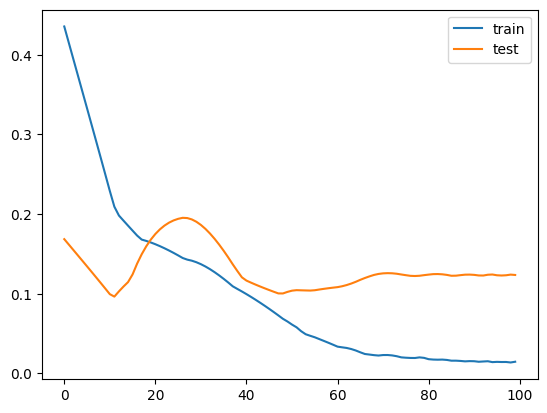

In [86]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [87]:
yhat = model.predict(test_X)


1/1 [==============================] - 0s 279ms/step


In [88]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))


In [89]:
# invert scaling for forecast
print(yhat.shape)
print(test_X[:, 1:].shape)

(3, 1)
(3, 15)


In [90]:
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)


In [91]:
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual


In [92]:
test_y = test_y.reshape((len(test_y), 1))


In [93]:
import math
from sklearn.metrics import mean_squared_error
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8.071


In [94]:
inv_yhat

array([297.5421 , 299.86493, 302.86755], dtype=float32)

In [95]:
inv_y

array([300.7, 303.7, 289.8], dtype=float32)

In [96]:
test_X

array([[0.18484259, 0.2790885 , 0.62846583, 0.31470132, 0.9961091 ,
        0.5472441 , 0.5265782 , 0.3531351 , 0.55734825, 0.        ,
        0.        , 0.696714  , 0.5575638 , 0.9552412 , 0.        ,
        0.14546835],
       [0.20147896, 0.4054463 , 0.4232903 , 0.1929555 , 0.9571985 ,
        0.51181126, 0.62126255, 0.22112226, 0.6451626 , 1.        ,
        0.        , 0.1459226 , 0.7425995 , 0.9552412 , 1.        ,
        0.16344416],
       [0.25693178, 0.5506418 , 0.25878006, 0.12174582, 0.8793775 ,
        0.3228345 , 0.7458472 , 0.22442245, 0.7293911 , 1.        ,
        0.        , 0.        , 1.        , 0.95641947, 1.        ,
        0.2960726 ]], dtype=float32)

In [97]:
#### TESTING PYTORCH #######

In [6]:
df

,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_LT_HS,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_NH_BED_STNGH,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS
YEAR,,,,,,,,,,,,,,,,
2009,343.9,85569.0,7.00,41.13,3.63,14.17,18.69,17.13,68.70,11.0,0.0,139100.0,160178.0,3655.0,1.0,12902.0
2010,333.3,86850.0,7.81,41.13,4.21,13.68,19.59,16.47,69.85,11.0,0.0,140143.0,152783.0,3678.0,1.0,13209.0
2011,318.7,89064.0,8.63,40.12,4.72,13.52,19.94,16.24,70.25,11.0,0.0,143179.0,144659.0,2829.0,1.0,19301.0
2012,311.5,90747.0,9.30,38.48,5.33,13.50,20.23,15.71,70.79,11.0,0.0,153815.0,144618.0,3453.0,1.0,12681.0
2013,303.1,91702.0,9.69,36.30,5.90,13.48,20.72,15.53,70.99,11.0,0.0,297430.0,155652.0,3443.0,1.0,12866.0
2014,300.4,93854.0,8.82,34.15,6.20,13.20,21.26,15.45,71.35,11.0,0.0,202523.0,150172.0,3415.0,1.0,13028.0
2015,299.8,96310.0,7.68,32.18,6.19,13.02,21.86,15.17,71.81,11.0,0.0,235637.0,154827.0,3640.0,1.0,13644.0
2016,300.7,101173.0,6.57,30.59,6.09,12.93,22.43,14.77,72.30,12.0,0.0,123416.0,158215.0,3640.0,2.0,13763.0
2017,303.7,106761.0,5.68,29.66,5.89,12.45,23.18,14.78,72.77,12.0,0.0,93685.0,162928.0,3641.0,2.0,14641.0


In [11]:
X, y = df.drop(columns=['CDCA_HEART_DTH_RATE_ABOVE35']), df.CDCA_HEART_DTH_RATE_ABOVE35.values

In [12]:
X.shape, y.shape

((10, 15), (10,))

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))

# X_trans = X
# y_trans = y.reshape(-1, 1)

In [17]:
len(X_trans)

10

In [18]:
y_trans

array([[1.        ],
       [0.80406654],
       [0.53419593],
       [0.40110906],
       [0.24584104],
       [0.19593346],
       [0.18484288],
       [0.20147874],
       [0.25693161],
       [0.        ]])

In [19]:
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, 5, 2)
print(X_ss.shape, y_mm.shape)

(5, 5, 15) (5, 2)


In [20]:
assert y_mm[0].all() == y_trans[4:6].squeeze(1).all()

y_mm[0]

array([0.24584104, 0.19593346])

In [21]:
y_trans[4:6].squeeze(1)

array([0.24584104, 0.19593346])

In [22]:
X_ss.shape

(5, 5, 15)

In [22]:
X_ss[:-4]

array([[[-1.00055912, -0.33888578,  1.26976182, -2.02228437,
          1.49910956, -1.48917816,  1.86669762, -1.73454911,
         -0.65465367,  0.        , -0.41488079,  1.11760031,
          0.63604892, -0.65465367, -0.6660087 ],
        [-0.88445638,  0.16385686,  1.26976182, -1.33995456,
          0.77325612, -0.96787892,  1.09427102, -0.96999124,
         -0.65465367,  0.        , -0.39741695, -0.16952853,
          0.73073581, -0.65465367, -0.50835223],
        [-0.68379168,  0.6728062 ,  1.05418619, -0.73997491,
          0.53624275, -0.76515144,  0.82509205, -0.70405807,
         -0.65465367,  0.        , -0.34658262, -1.58354269,
         -2.76444561, -0.65465367,  2.62012722],
        [-0.53125389,  1.08865506,  0.70414259, -0.02235218,
          0.50661608, -0.59717724,  0.20481008, -0.34504829,
         -0.65465367,  0.        , -0.16849504, -1.5906789 ,
         -0.19554902, -0.65465367, -0.77950081],
        [-0.44469798,  1.33071633,  0.23884073,  0.64821331,
          0

In [23]:
total_samples = len(X)
train_test_cutoff = round(0.40 * total_samples)

X_train = X_ss[:-2]
X_test = X_ss[-2:]

y_train = y_mm[:-2]
y_test = y_mm[-2:]

print("Training Shape:", X_train.shape, y_train.shape)
print("Testing Shape:", X_test.shape, y_test.shape) 


Training Shape: (3, 5, 15) (3, 2)
Testing Shape: (2, 5, 15) (2, 2)


In [24]:
X_train

array([[[-1.00055912e+00, -3.38885782e-01,  1.26976182e+00,
         -2.02228437e+00,  1.49910956e+00, -1.48917816e+00,
          1.86669762e+00, -1.73454911e+00, -6.54653671e-01,
          0.00000000e+00, -4.14880788e-01,  1.11760031e+00,
          6.36048916e-01, -6.54653671e-01, -6.66008701e-01],
        [-8.84456377e-01,  1.63856861e-01,  1.26976182e+00,
         -1.33995456e+00,  7.73256118e-01, -9.67878921e-01,
          1.09427102e+00, -9.69991241e-01, -6.54653671e-01,
          0.00000000e+00, -3.97416953e-01, -1.69528532e-01,
          7.30735810e-01, -6.54653671e-01, -5.08352234e-01],
        [-6.83791683e-01,  6.72806204e-01,  1.05418619e+00,
         -7.39974908e-01,  5.36242748e-01, -7.65151439e-01,
          8.25092053e-01, -7.04058070e-01, -6.54653671e-01,
          0.00000000e+00, -3.46582624e-01, -1.58354269e+00,
         -2.76444561e+00, -6.54653671e-01,  2.62012722e+00],
        [-5.31253887e-01,  1.08865506e+00,  7.04142587e-01,
         -2.23521832e-02,  5.06616077

In [25]:
import torch

In [27]:
X_train_tensors = torch.from_numpy(X_train)
X_test_tensors = torch.from_numpy(X_test)
y_train_tensors = torch.from_numpy(y_train)
y_test_tensors = torch.from_numpy(y_test)
# X_train_tensors = Variable(torch.Tensor(X_train))
# X_test_tensors = Variable(torch.Tensor(X_test))

# y_train_tensors = Variable(torch.Tensor(y_train))
# y_test_tensors = Variable(torch.Tensor(y_test))

In [28]:
X_train_tensors

tensor([[[-1.0006e+00, -3.3889e-01,  1.2698e+00, -2.0223e+00,  1.4991e+00,
          -1.4892e+00,  1.8667e+00, -1.7345e+00, -6.5465e-01,  0.0000e+00,
          -4.1488e-01,  1.1176e+00,  6.3605e-01, -6.5465e-01, -6.6601e-01],
         [-8.8446e-01,  1.6386e-01,  1.2698e+00, -1.3400e+00,  7.7326e-01,
          -9.6788e-01,  1.0943e+00, -9.6999e-01, -6.5465e-01,  0.0000e+00,
          -3.9742e-01, -1.6953e-01,  7.3074e-01, -6.5465e-01, -5.0835e-01],
         [-6.8379e-01,  6.7281e-01,  1.0542e+00, -7.3997e-01,  5.3624e-01,
          -7.6515e-01,  8.2509e-01, -7.0406e-01, -6.5465e-01,  0.0000e+00,
          -3.4658e-01, -1.5835e+00, -2.7644e+00, -6.5465e-01,  2.6201e+00],
         [-5.3125e-01,  1.0887e+00,  7.0414e-01, -2.2352e-02,  5.0662e-01,
          -5.9718e-01,  2.0481e-01, -3.4505e-01, -6.5465e-01,  0.0000e+00,
          -1.6850e-01, -1.5907e+00, -1.9555e-01, -6.5465e-01, -7.7950e-01],
         [-4.4470e-01,  1.3307e+00,  2.3884e-01,  6.4821e-01,  4.7699e-01,
          -3.1336e-01

In [29]:
X_train_tensors_final = torch.reshape(X_train_tensors,   
                                      (X_train_tensors.shape[0], 5, 
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,  
                                     (X_test_tensors.shape[0], 5, 
                                      X_test_tensors.shape[2])) 

print("Training Shape:", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape:", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape: torch.Size([3, 5, 15]) torch.Size([3, 2])
Testing Shape: torch.Size([2, 5, 15]) torch.Size([2, 2])


In [30]:
X_check, y_check = split_sequences(X, y.reshape(-1, 1), 5, 2)
X_check[-1][0:15]

array([[9.17020e+04, 9.69000e+00, 3.63000e+01, 5.90000e+00, 1.34800e+01,
        2.07200e+01, 1.55300e+01, 7.09900e+01, 1.10000e+01, 0.00000e+00,
        2.97430e+05, 1.55652e+05, 3.44300e+03, 1.00000e+00, 1.28660e+04],
       [9.38540e+04, 8.82000e+00, 3.41500e+01, 6.20000e+00, 1.32000e+01,
        2.12600e+01, 1.54500e+01, 7.13500e+01, 1.10000e+01, 0.00000e+00,
        2.02523e+05, 1.50172e+05, 3.41500e+03, 1.00000e+00, 1.30280e+04],
       [9.63100e+04, 7.68000e+00, 3.21800e+01, 6.19000e+00, 1.30200e+01,
        2.18600e+01, 1.51700e+01, 7.18100e+01, 1.10000e+01, 0.00000e+00,
        2.35637e+05, 1.54827e+05, 3.64000e+03, 1.00000e+00, 1.36440e+04],
       [1.01173e+05, 6.57000e+00, 3.05900e+01, 6.09000e+00, 1.29300e+01,
        2.24300e+01, 1.47700e+01, 7.23000e+01, 1.20000e+01, 0.00000e+00,
        1.23416e+05, 1.58215e+05, 3.64000e+03, 2.00000e+00, 1.37630e+04],
       [1.06761e+05, 5.68000e+00, 2.96600e+01, 5.89000e+00, 1.24500e+01,
        2.31800e+01, 1.47800e+01, 7.27700e+01, 

In [31]:
y_check[-1]

array([303.7, 289.8])

In [33]:
df.CDCA_HEART_DTH_RATE_ABOVE35.values[-2:]

array([303.7, 289.8])

In [37]:
import torch.nn as nn
from torch.autograd import Variable

In [38]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2) # lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) # fully connected 
        self.fc_2 = nn.Linear(128, num_classes) # fully connected last layer
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # hidden state
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # cell state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

In [39]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train,
                  X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        # test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        if epoch % 100 == 0:
            print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch, 
                                                                      loss.item(), 
                                                                      test_loss.item())) 

In [42]:
import warnings
warnings.filterwarnings('ignore')

n_epochs = 1000 # 1000 epochs
learning_rate = 0.001 # 0.001 lr

input_size = 15 # number of features
hidden_size = 2 # number of features in hidden state
num_layers = 1 # number of stacked lstm layers

num_classes = 2 # number of output classes 

lstm = LSTM(num_classes, 
              input_size, 
              hidden_size, 
              num_layers)
loss_fn = torch.nn.MSELoss()    # mean-squared error for regression
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate)


In [45]:
training_loop(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train_tensors_final.double(),
              y_train=y_train_tensors.double(),
              X_test=X_test_tensors_final.double(),
              y_test=y_test_tensors.double())

RuntimeError: expected scalar type Double but found Float

In [48]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

In [49]:
print('Tensorflow Version: ' + tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Tensorflow Version: 2.11.0
Num GPUs: 0


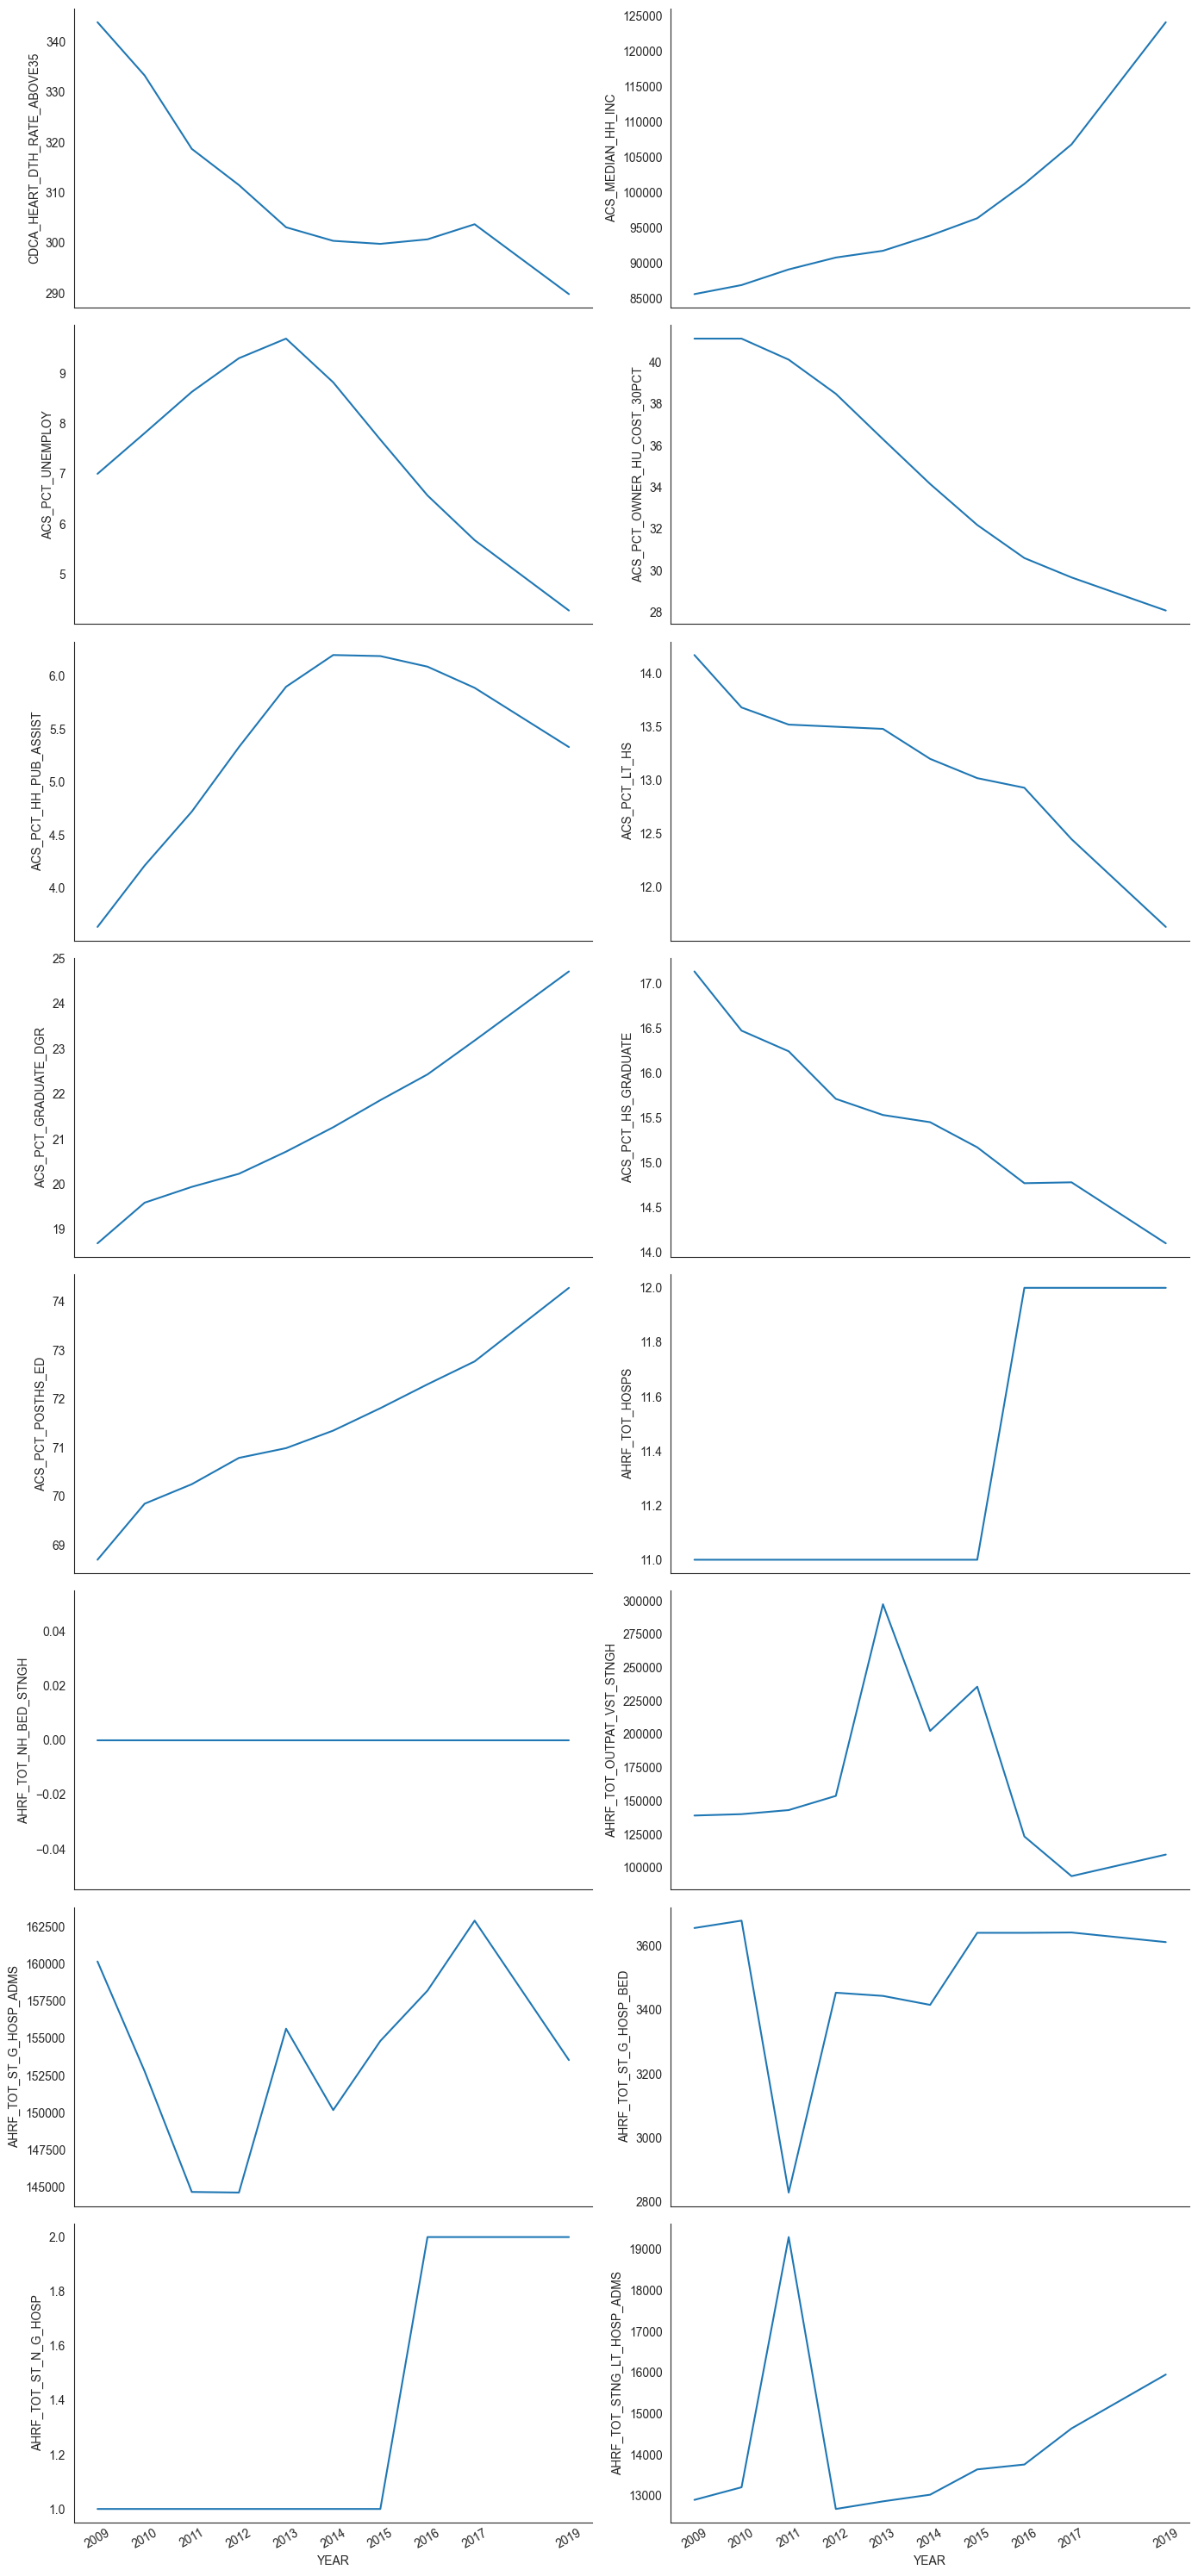

In [55]:
df_plot = df.copy()
ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 30))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.set_xticks(df_plot.index)
#         ax.xaxis.set_major_locator(df_plot.index)
fig.tight_layout()
plt.show()

In [58]:
train_df = df.copy()
FEATURES = train_df.columns
print('FEATURE LIST')
print([f for f in FEATURES])
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]
data_filtered_ext = data_filtered.copy()
data_filtered_ext['Prediction'] = data_filtered_ext['CDCA_HEART_DTH_RATE_ABOVE35']
data_filtered_ext.tail()

FEATURE LIST
['CDCA_HEART_DTH_RATE_ABOVE35', 'ACS_MEDIAN_HH_INC', 'ACS_PCT_UNEMPLOY', 'ACS_PCT_OWNER_HU_COST_30PCT', 'ACS_PCT_HH_PUB_ASSIST', 'ACS_PCT_LT_HS', 'ACS_PCT_GRADUATE_DGR', 'ACS_PCT_HS_GRADUATE', 'ACS_PCT_POSTHS_ED', 'AHRF_TOT_HOSPS', 'AHRF_TOT_NH_BED_STNGH', 'AHRF_TOT_OUTPAT_VST_STNGH', 'AHRF_TOT_ST_G_HOSP_ADMS', 'AHRF_TOT_ST_G_HOSP_BED', 'AHRF_TOT_ST_N_G_HOSP', 'AHRF_TOT_STNG_LT_HOSP_ADMS']


,CDCA_HEART_DTH_RATE_ABOVE35,ACS_MEDIAN_HH_INC,ACS_PCT_UNEMPLOY,ACS_PCT_OWNER_HU_COST_30PCT,ACS_PCT_HH_PUB_ASSIST,ACS_PCT_LT_HS,ACS_PCT_GRADUATE_DGR,ACS_PCT_HS_GRADUATE,ACS_PCT_POSTHS_ED,AHRF_TOT_HOSPS,AHRF_TOT_NH_BED_STNGH,AHRF_TOT_OUTPAT_VST_STNGH,AHRF_TOT_ST_G_HOSP_ADMS,AHRF_TOT_ST_G_HOSP_BED,AHRF_TOT_ST_N_G_HOSP,AHRF_TOT_STNG_LT_HOSP_ADMS,Prediction
YEAR,,,,,,,,,,,,,,,,,
2014,300.4,93854.0,8.82,34.15,6.20,13.20,21.26,15.45,71.35,11.0,0.0,202523.0,150172.0,3415.0,1.0,13028.0,300.4
2015,299.8,96310.0,7.68,32.18,6.19,13.02,21.86,15.17,71.81,11.0,0.0,235637.0,154827.0,3640.0,1.0,13644.0,299.8
2016,300.7,101173.0,6.57,30.59,6.09,12.93,22.43,14.77,72.30,12.0,0.0,123416.0,158215.0,3640.0,2.0,13763.0,300.7
2017,303.7,106761.0,5.68,29.66,5.89,12.45,23.18,14.78,72.77,12.0,0.0,93685.0,162928.0,3641.0,2.0,14641.0,303.7
2019,289.8,124055.0,4.28,28.07,5.33,11.63,24.71,14.10,74.28,12.0,0.0,109853.0,153538.0,3611.0,2.0,15954.0,289.8


In [59]:
nrows = data_filtered.shape[0]
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

(10, 16)


In [60]:
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

In [61]:
scaler_pred = MinMaxScaler()
df_CDCA_HEART_DTH_RATE_ABOVE35 = pd.DataFrame(data_filtered_ext['CDCA_HEART_DTH_RATE_ABOVE35'])
np_CDCA_HEART_DTH_RATE_ABOVE35_scaled = scaler_pred.fit_transform(df_CDCA_HEART_DTH_RATE_ABOVE35)

In [88]:
sequence_length = 3
index_CDCA_HEART_DTH_RATE_ABOVE35 = data.columns.get_loc("CDCA_HEART_DTH_RATE_ABOVE35")

In [128]:
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.5)

In [129]:
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

In [130]:
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index_CDCA_HEART_DTH_RATE_ABOVE35]) #contains the prediction values for validation,  for single-step prediction
    
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

In [131]:
x_train, y_train = partition_dataset(sequence_length, train_data)
x_test, y_test = partition_dataset(sequence_length, test_data)

In [132]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2, 3, 16) (2,)
(5, 3, 16) (5,)


In [133]:
print(x_train[1][sequence_length-1][index_CDCA_HEART_DTH_RATE_ABOVE35])
print(y_train[0])

0.4011090573012943
0.4011090573012943


In [141]:
# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mae')

48 3 16


In [142]:
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.4133 - val_loss: 0.1750
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.3476 - val_loss: 0.1398
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 0.2814 - val_loss: 0.1042
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2142 - val_loss: 0.0676
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 0.1453 - val_loss: 0.0745
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0743 - val_loss: 0.1208
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0649 - val_loss: 0.1764
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0670 - val_loss: 0.2044
Epoch 9/50
1/1 [==============================] - 0s 25ms/step - loss: 0.1015 - val_loss: 0.2124
Epoch 10/50
1/1 [==============================] - 0s 24ms/step - loss: 0.1123 - val_loss: 0.2063
Epoch 11/50
1/1 [==============

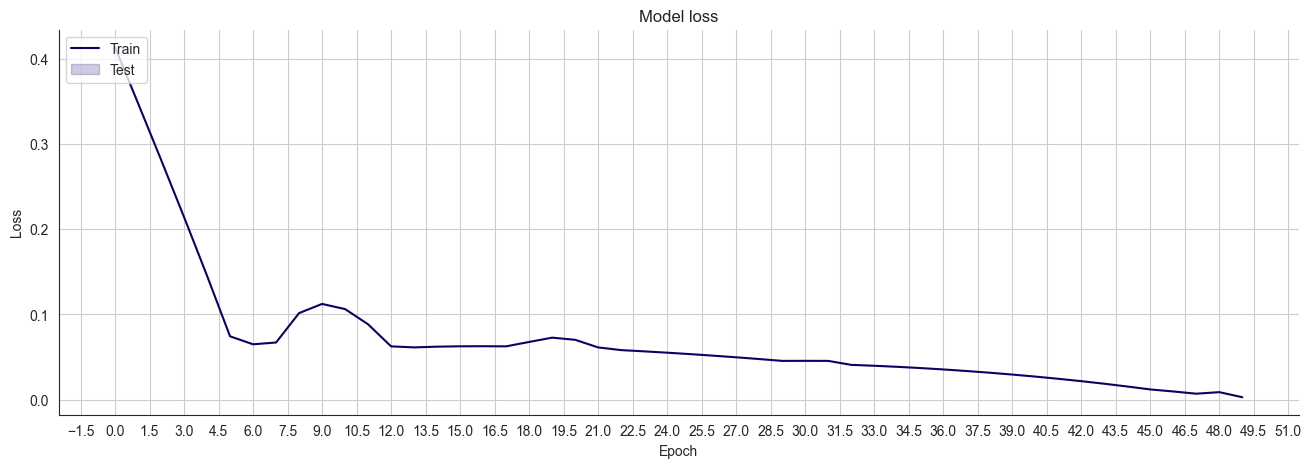

In [143]:
fig, ax = plt.subplots(figsize=(16, 5), sharex=True)
sns.lineplot(data=history.history["loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
ax.xaxis.set_major_locator(plt.MaxNLocator(epochs))
plt.legend(["Train", "Test"], loc="upper left")
plt.grid()
plt.show()

In [144]:
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

1/1 [==============================] - 1s 507ms/step
Median Absolute Error (MAE): 4.85
Mean Absolute Percentage Error (MAPE): 1.63 %
Median Absolute Percentage Error (MDAPE): 1.29 %


In [145]:
train = pd.DataFrame(data_filtered_ext['CDCA_HEART_DTH_RATE_ABOVE35'][:train_data_len + 1]).rename(columns={'CDCA_HEART_DTH_RATE_ABOVE35': 'y_train'})
valid = pd.DataFrame(data_filtered_ext['CDCA_HEART_DTH_RATE_ABOVE35'][train_data_len:]).rename(columns={'CDCA_HEART_DTH_RATE_ABOVE35': 'y_test'})
valid.insert(1, "y_pred", y_pred, True)
valid.insert(1, "residuals", valid["y_pred"] - valid["y_test"], True)
df_union = pd.concat([train, valid])

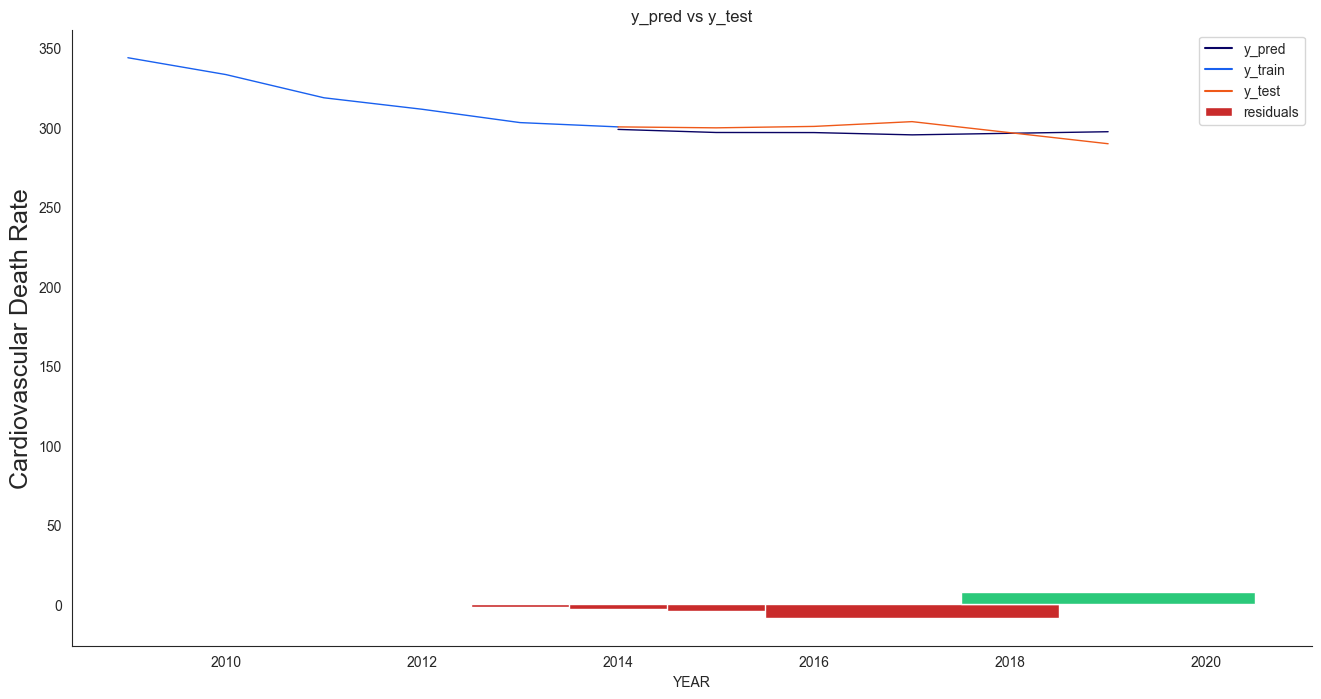

In [146]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("y_pred vs y_test")
plt.ylabel("Cardiovascular Death Rate", fontsize=18)
sns.set_palette(["#090364", "#1960EF", "#EF5919"])
sns.lineplot(data=df_union[['y_pred', 'y_train', 'y_test']], linewidth=1.0, dashes=False, ax=ax1)

df_sub = ["#2BC97A" if x > 0 else "#C92B2B" for x in df_union["residuals"].dropna()]
ax1.bar(height=df_union['residuals'].dropna(), x=df_union['residuals'].dropna().index, width=3, label='residuals', color=df_sub)
plt.legend()
plt.show()

In [171]:
scaled_df = scaler.fit_transform(df)

In [183]:
X = []
y = []
lookback = 2
for i in range (lookback, len(df)):
    X.append(scaled_df[i - lookback: i, :])
    y.append(scaled_df[i, 0])
X, y  = np.array(X), np.array(y)

In [184]:
train_size = int(len(df) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [185]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [186]:
model.compile(optimizer = 'adam', loss = 'mse')

In [203]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 100, verbose = 1)

Epoch 1/100
1/1 [==============================] - 0s 7ms/step - loss: 2.5476e-04
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 2.1360e-04
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 1.6343e-04
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3253e-04
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1.2585e-04
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 1.2553e-04
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1.1202e-04
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.3541e-05
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 5.5711e-05
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 4.4351e-05
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 4.9676e-05
Epoch 12/100
1/1 [==============================] - 0s 6ms/step - loss: 5.7465e-05
Epoch 13/100


In [204]:
test_loss = model.evaluate(X_test, y_test)
print (test_loss)

1/1 [==============================] - 1s 540ms/step - loss: 0.0026
0.0025950875133275986


In [209]:
n_periods = 5
generated_X = X[-lookback:, :, :]
generated_data = []
for i in range (n_periods):
    generated_y = model.predict(np.array(generated_X))
    print(generated_y)
    generated_data.append(generated_y)
#     print(generated_X[:, 1:, :])
    print(generated_y.reshape((1, 1, -1)))
    print(generated_X[:, 1:, :])
    generated_X = np.concatenate((generated_X[:, 1:, :], generated_y.reshape((1, 1, -1))), axis = 1)
# generated_data = np.concatenate([np.array(generated_data).reshape(-1), np.zeros(15)]).reshape(1, -1)
# print(generated_data)
# generated_data = scaler.inverse_transform(generated_data).reshape(-1)
# generated_data.astype(int)

1/1 [==============================] - 0s 16ms/step
[[0.1860675 ]
 [0.01297901]]
[[[0.1860675  0.01297901]]]
[[[0.20147874 0.40544614 0.4232902  0.19295559 0.95719844 0.51181102
   0.62126246 0.22112211 0.64516129 1.         0.         0.1459226
   0.74259967 0.95524146 1.         0.16344411]]

 [[0.25693161 0.55064179 0.25878004 0.12174579 0.87937743 0.32283465
   0.74584718 0.22442244 0.72939068 1.         0.         0.
   1.         0.95641932 1.         0.29607251]]]


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 1

In [161]:
df_temp = df[-sequence_length:]
print(df_temp, end = '\n\n\n\n\n\n')
new_df = df_temp.filter(FEATURES)
N = sequence_length
print(new_df)
generated_preds = []
n_years = 5

last_N_days = new_df[-sequence_length:].values
print(last_N_days.shape)
last_N_days_scaled = scaler.transform(last_N_days)
X_test_new = []
X_test_new.append(last_N_days_scaled)
X_test_new = np.array(X_test_new)
for i in range (n_years):
    pred_rate_scaled = model.predict(X_test_new)
    pred_rate_unscaled = scaler_pred.inverse_transform(pred_rate_scaled.reshape(-1, 1))
    
#     rate_current = np.round(new_df['CDCA_HEART_DTH_RATE_ABOVE35'].values[-1], 2)
    predicted_rate = np.round(pred_rate_unscaled.ravel()[0], 2)
#     change_percent = np.round(100 - (rate_current * 100)/predicted_rate, 2)

#     print(rate_current)
    print (predicted_rate)
#     print(np.array(X_test_new).shape)
    
    generated_preds.append(predicted_rate)
    
    X_test_new = np.concatenate((X_test_new[:, 1:, :], pred_rate_scaled.reshape((1, 1, 1))), axis = 1)

      CDCA_HEART_DTH_RATE_ABOVE35  ACS_MEDIAN_HH_INC  ACS_PCT_UNEMPLOY  \
YEAR                                                                     
2016                        300.7           101173.0              6.57   
2017                        303.7           106761.0              5.68   
2019                        289.8           124055.0              4.28   

      ACS_PCT_OWNER_HU_COST_30PCT  ACS_PCT_HH_PUB_ASSIST  ACS_PCT_LT_HS  \
YEAR                                                                      
2016                        30.59                   6.09          12.93   
2017                        29.66                   5.89          12.45   
2019                        28.07                   5.33          11.63   

      ACS_PCT_GRADUATE_DGR  ACS_PCT_HS_GRADUATE  ACS_PCT_POSTHS_ED  \
YEAR                                                                 
2016                 22.43                14.77              72.30   
2017                 23.18                1

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 16 and the array at index 1 has size 1

In [160]:
n_years = 5
generated_X = X_test[-1:, :, :]
# generated_X.shape
print (X_test)
generated_preds = []
for i in range (n_years):
    generated_y = model.predict(np.array(generated_X))
    generated_preds.append(generated_y)
    generated_X = np.concatenate((generated_X[:, 1:, :], generated_y.reshape((1, 1, 1))), axis = 1)
generated_data = np.array(generated_data)
generated_data = scaler.inverse_transform(generated_data).reshape(-1)


[[[-5.31253887e-01  1.08865506e+00  7.04142587e-01 -2.23521832e-02
    5.06616077e-01 -5.97177240e-01  2.04810084e-01 -3.45048289e-01
   -6.54653671e-01  0.00000000e+00 -1.68495036e-01 -1.59067890e+00
   -1.95549019e-01 -6.54653671e-01 -7.79500815e-01]
  [-4.44697978e-01  1.33071633e+00  2.38840726e-01  6.48213314e-01
    4.76989406e-01 -3.13358765e-01 -5.85171669e-03 -2.12081704e-01
   -6.54653671e-01  0.00000000e+00  2.23617297e+00  3.29832205e-01
   -2.36717234e-01 -6.54653671e-01 -6.84496104e-01]
  [-2.49652620e-01  7.90733491e-01 -2.20057898e-01  1.00114252e+00
    6.22160095e-02 -5.79221377e-04 -9.94791837e-02  2.72581500e-02
   -6.54653671e-01  0.00000000e+00  6.47064407e-01 -6.23983353e-01
   -3.51988235e-01 -6.54653671e-01 -6.01302789e-01]
  [-2.70543863e-02  8.31697706e-02 -6.40537103e-01  9.89378215e-01
   -2.04424031e-01  3.46953605e-01 -4.27175318e-01  3.33081296e-01
   -6.54653671e-01  0.00000000e+00  1.20152025e+00  1.86237709e-01
    5.74296594e-01 -6.54653671e-01 -2.84